In [32]:
%matplotlib inline
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns

plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.family'] = 'Malgun Gothic'

from tqdm import tqdm_notebook            # pip install tqdm
from libs import stock_daum, stock_naver  # local libraries

## KOSPI 200 크롤링하기

In [33]:
df_list = []
for page_df in tqdm_notebook(stock_naver.get_kospi200('KPI200', 600)):
    df_list.append(page_df)

kpi200_df = pd.concat(df_list)
print(kpi200_df.shape)
kpi200_df.head()


(3191, 5)


,체결가,전일비,등락률,거래량(천주),거래대금(백만)
날짜,,,,,
2018-11-27,272.08,2.29,+0.85%,71912.0,3546474.0
2018-11-26,269.79,3.46,+1.30%,73634.0,3407821.0
2018-11-23,266.33,1.43,-0.53%,57834.0,2629660.0
2018-11-22,267.76,0.51,-0.19%,63147.0,2917863.0
2018-11-21,268.27,1.31,-0.49%,79375.0,3726326.0


## S&P 500 크롤링하기

+ http://finance.daum.net/global/quotes/US.

In [34]:
df_list = []
for page_df in tqdm_notebook(stock_daum.get_us_sp500()):
    df_list.append(page_df)

us_sp500_df = pd.concat(df_list)
print(us_sp500_df.shape)
us_sp500_df.head()


(3499, 15)


,accTradePrice,accTradeVolume,change,changePrice,changeRate,exchangeCountry,highPrice,lowPrice,openingPrice,periodTradePrice,periodTradeVolume,prevClosingPrice,symbolCode,tradePrice,tradeTime
date,,,,,,,,,,,,,,,
2018-11-26,0,2183112736,RISE,40.89,0.015532,USA,2674.35,2649.97,2649.97,0,2183112736,2632.56,US.SP500,2673.45,16:03:56
2018-11-23,0,979361881,FALL,17.37,-0.006555,USA,2647.55,2631.09,2633.36,0,979361881,2649.93,US.SP500,2632.56,13:03:44
2018-11-21,0,2024749521,RISE,8.04,0.003043,USA,2670.73,2649.82,2657.74,0,2024749521,2641.89,US.SP500,2649.93,16:04:14
2018-11-20,0,2852849987,FALL,48.84,-0.018151,USA,2669.44,2631.52,2654.60,0,2852849987,2690.73,US.SP500,2641.89,16:04:42
2018-11-19,0,2488756017,FALL,45.54,-0.016643,USA,2733.16,2681.09,2730.74,0,2488756017,2736.27,US.SP500,2690.73,16:04:15


## 한 Axes에 그리기

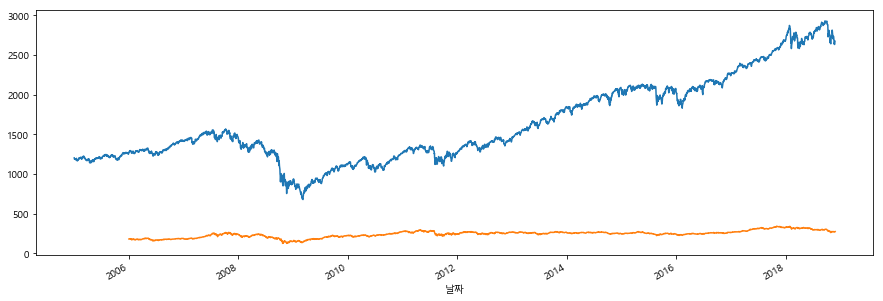

In [35]:
# 한 AX에 그리기
ax = us_sp500_df['tradePrice'].plot(figsize=(15, 5))
kpi200_df['체결가'].plot(figsize=(15, 5), ax=ax)

In [36]:
df = pd.DataFrame({
    'kpi200': kpi200_df['체결가'],
    'us_sp500': us_sp500_df['tradePrice'],
})
print(df.shape)
df.head()

(3596, 2)


,kpi200,us_sp500
2005-01-03,NaN,1202.08
2005-01-04,NaN,1188.05
2005-01-05,NaN,1183.74
2005-01-06,NaN,1187.89
2005-01-07,NaN,1186.19


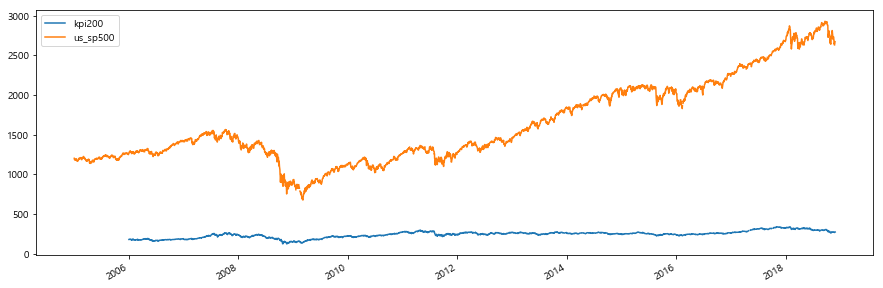

In [37]:
df.plot(figsize=(15, 5))

## 단위가 다른 2개 차트를 Ratio로 표현하여 맞추기

In [38]:
시작가 = kpi200_df['체결가'][0]
kpi200_ratio_series = 100 * kpi200_df['체결가'] / 시작가

In [39]:
시작가 = us_sp500_df['tradePrice'][0]
us_sp500_ratio_series = 100 * us_sp500_df['tradePrice'] / 시작가

In [40]:
df = pd.DataFrame({
    'kpi200': kpi200_ratio_series,
    'us_sp500': us_sp500_ratio_series,
})
print(df.shape)
df.head()

(3596, 2)


,kpi200,us_sp500
2005-01-03,NaN,44.963624
2005-01-04,NaN,44.438834
2005-01-05,NaN,44.277619
2005-01-06,NaN,44.432849
2005-01-07,NaN,44.369261


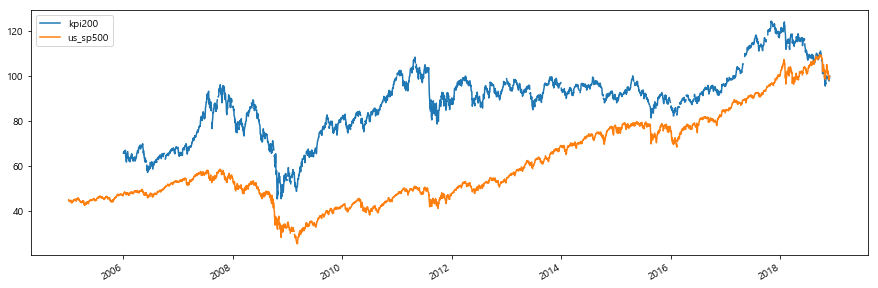

In [41]:
df.plot(figsize=(15, 5))